In [1]:
# Dependencies
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
nb_loc = os.getcwd()
zecon_dataset_loc = os.path.join(nb_loc,'datasets','zecon')
datasets = os.listdir(zecon_dataset_loc)
template = pd.DataFrame({'name': [],
                        'contents' : []})
zdata = template
# for file in datasets:
#     tokens = file.split('.')
#     file_ext = tokens[-1]
#     if file_ext == 'json':
#         contents = pd.read_json(os.path.join(zecon_dataset_loc,file))
#     elif file_ext == 'csv':
#         contents = pd.read_csv(os.path.join(zecon_dataset_loc,file))
#     name = file
    # Need to create system to store each files data separately...
    
    

In [3]:
crosswalk = pd.read_csv(os.path.join(zecon_dataset_loc,datasets[4]))

In [5]:
city_time_series = pd.read_csv(os.path.join(zecon_dataset_loc,datasets[2]))

In [7]:
combine = city_time_series.merge(crosswalk,right_on = 'Unique_City_ID', left_on = 'RegionName')

In [18]:
combine.loc[combine['State']=='CA'].groupby(['County'])['RegionName'].count()

County
Alameda             4285
Alpine               614
Amador              2210
Butte               3032
Calaveras           2702
Colusa              1095
Contra Costa        7105
Del Norte            682
El Dorado           4277
Fresno              7479
Glenn                812
Humboldt            4690
Imperial            2643
Inyo                1420
Kern                7702
Kings               1514
Lake                2835
Lassen              1994
Los Angeles        29133
Madera              1941
Marin               5317
Mariposa             895
Mendocino           3488
Merced              3216
Modoc               1005
Mono                1110
Monterey            4662
Napa                1529
Nevada              1731
Orange              9998
Placer              5038
Plumas              2302
Riverside          11771
Sacramento          5687
San Benito           543
San Bernardino     13697
San Diego          10296
San Francisco        257
San Joaquin         5086
San Luis Obispo   

In [45]:
county_of_interest = 'San Mateo'
combine.loc[combine['County']==county_of_interest].count()

Date                                                             7084
RegionName                                                       7084
HomesSoldAsForeclosuresRatio_AllHomes                            2301
InventorySeasonallyAdjusted_AllHomes                              460
InventoryRaw_AllHomes                                             460
MedianListingPricePerSqft_1Bedroom                                  0
MedianListingPricePerSqft_2Bedroom                                 71
MedianListingPricePerSqft_3Bedroom                                211
MedianListingPricePerSqft_4Bedroom                                  0
MedianListingPricePerSqft_5BedroomOrMore                            0
MedianListingPricePerSqft_AllHomes                                768
MedianListingPricePerSqft_CondoCoop                                92
MedianListingPricePerSqft_DuplexTriplex                             0
MedianListingPricePerSqft_SingleFamilyResidence                   609
MedianListingPrice_1

In [34]:
col_of_interest = ['Date','City','County','State','RegionName',
                      'PriceToRentRatio_AllHomes','MedianSoldPrice_AllHomes',
                     'MedianSoldPricePerSqft_AllHomes']
sample = combine.loc[combine['County']=='San Mateo',col_of_interest]
# sample = city_time_series[col_of_interest].dropna(how='any')

In [63]:
test_year = '1990'
convert_timescale(str2unix('%s-01-01' % test_year))%1+int(test_year)

1990.0146118721461

In [64]:
def str2unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
def convert_timescale(x):
    return x/(60*60*24*365)
def extract_year(x):
    return datetime.datetime.strptime(x, "%Y-%m-%d").timetuple().tm_year
def express_as_year(x):
    return convert_timescale(str2unix(x))%1+extract_year(x)

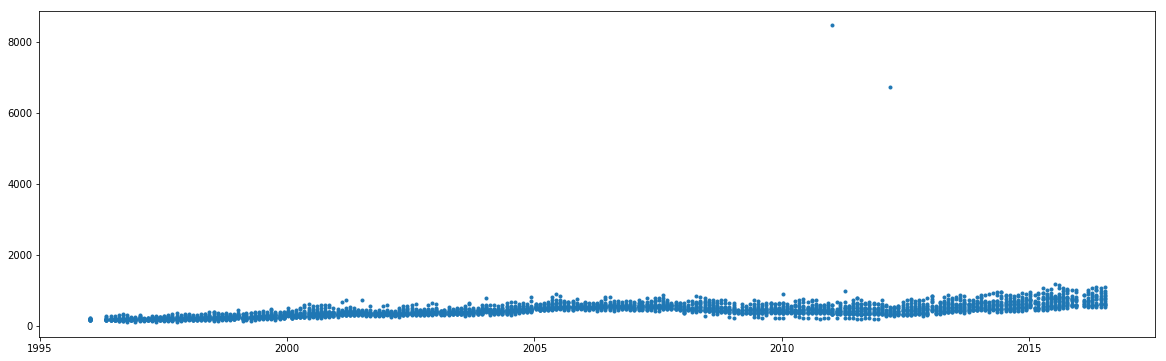

In [65]:
plt.figure(figsize=[20,6])
plt.plot(sample['Date'].apply(express_as_year),sample['MedianSoldPricePerSqft_AllHomes'],'.')
plt.show()

In [48]:
sample.max()

Date                                        2017-08-31
City                                          Woodside
County                                       San Mateo
State                                               CA
RegionName                         woodsidesan_mateoca
PriceToRentRatio_AllHomes                        30.88
MedianSoldPrice_AllHomes                   1.01022e+07
MedianSoldPricePerSqft_AllHomes                8468.93
dtype: object

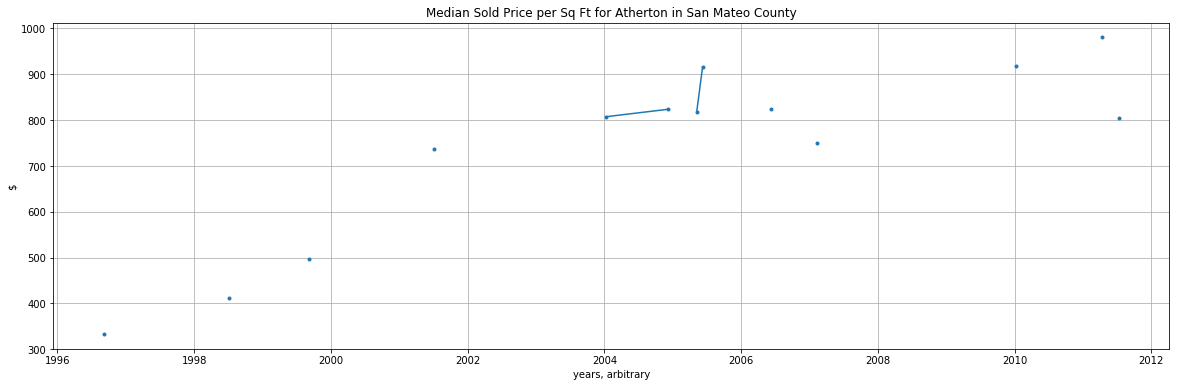

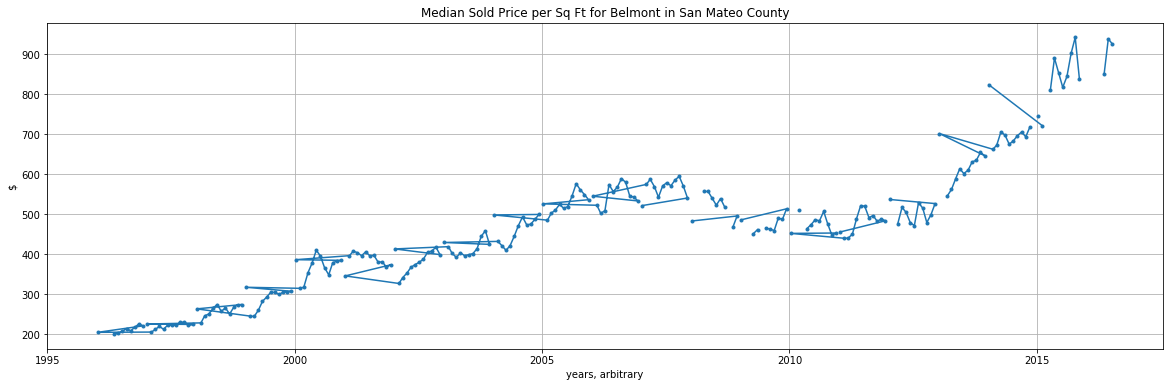

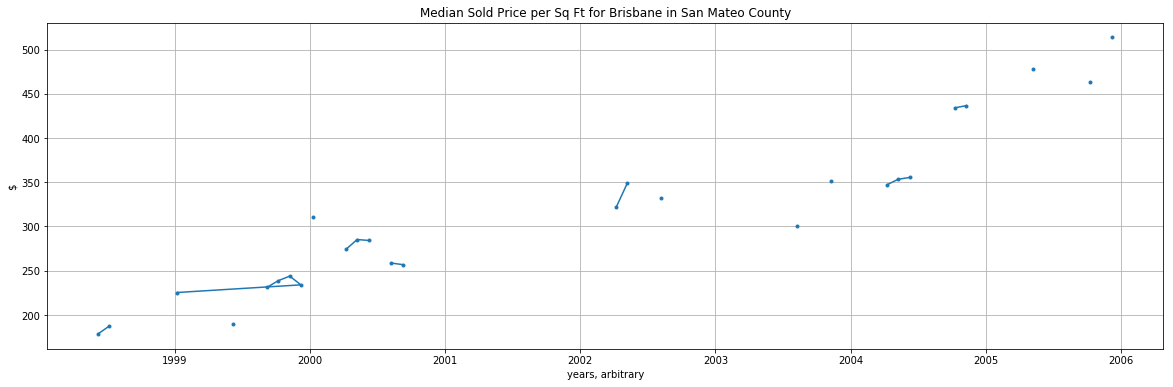

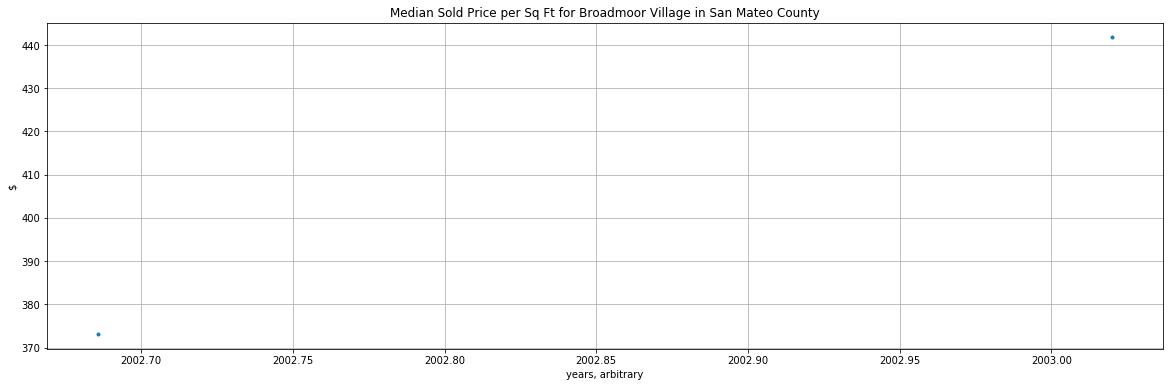

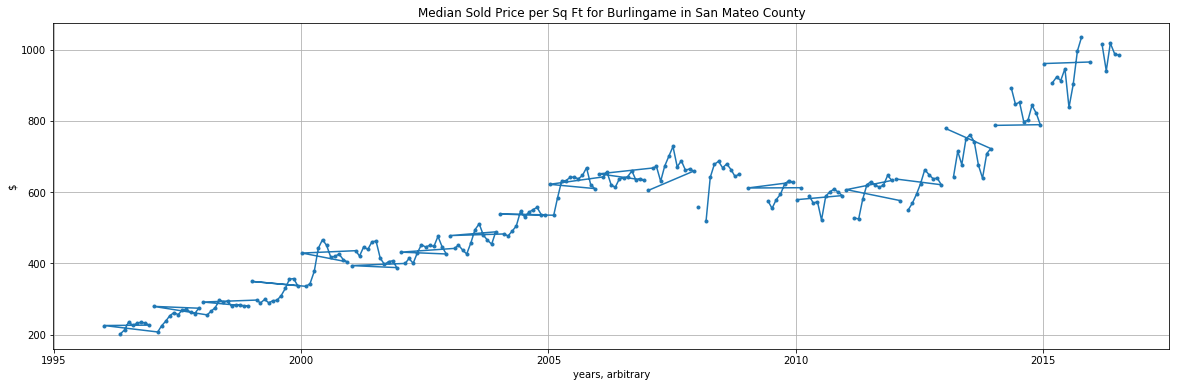

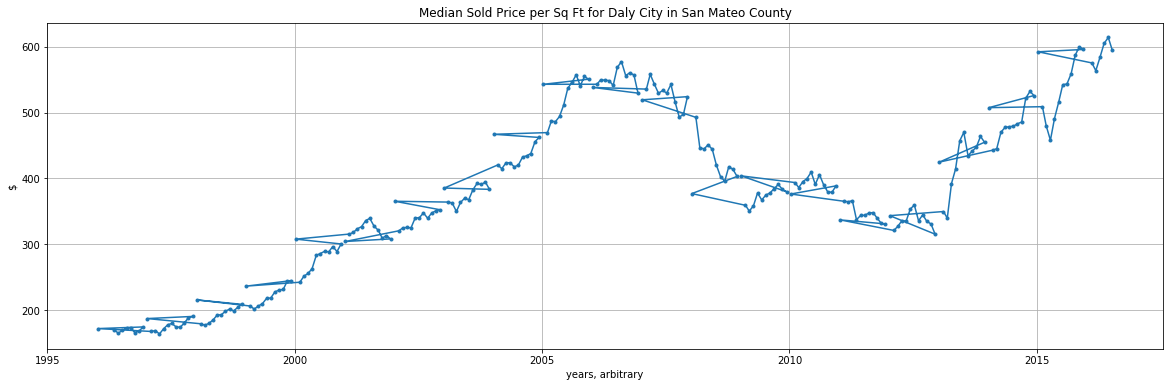

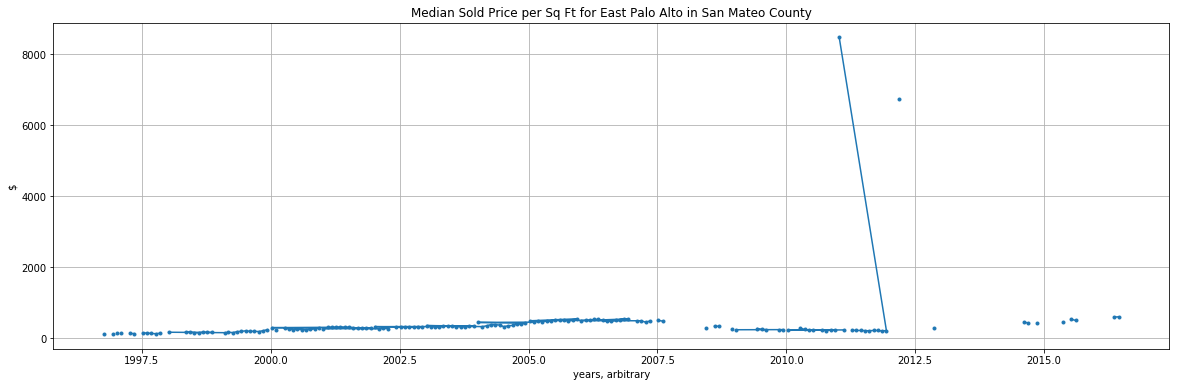

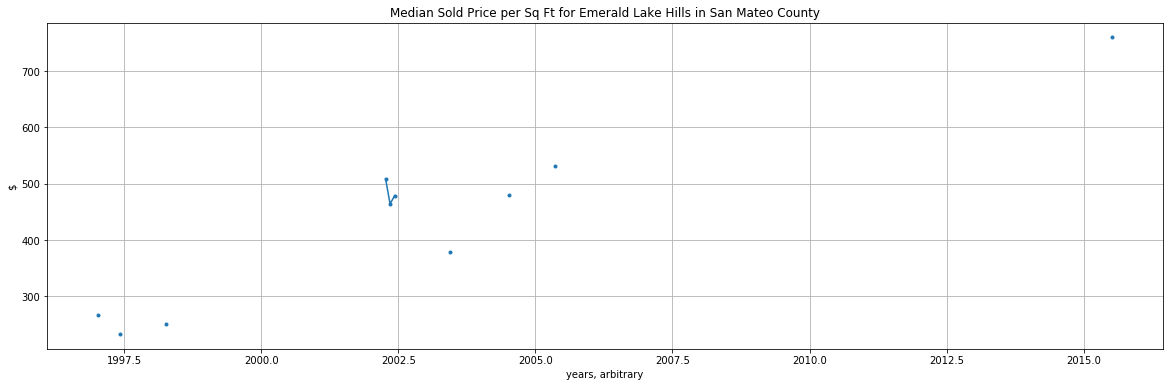

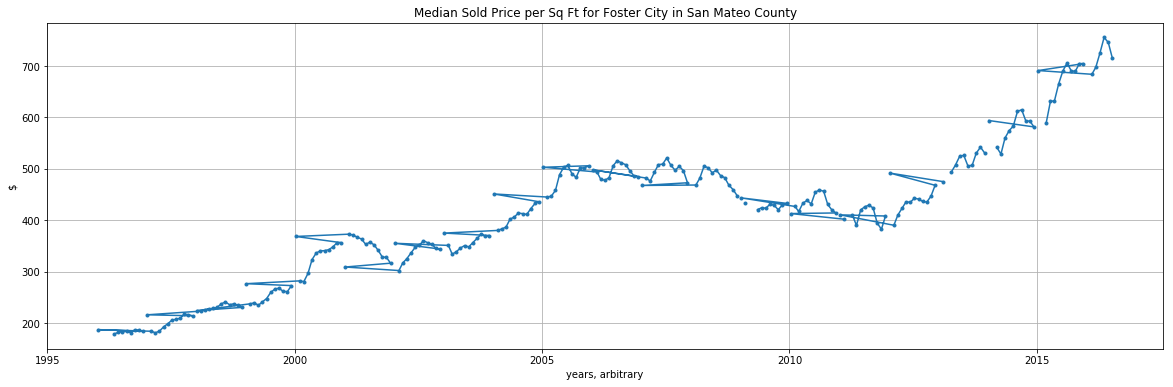

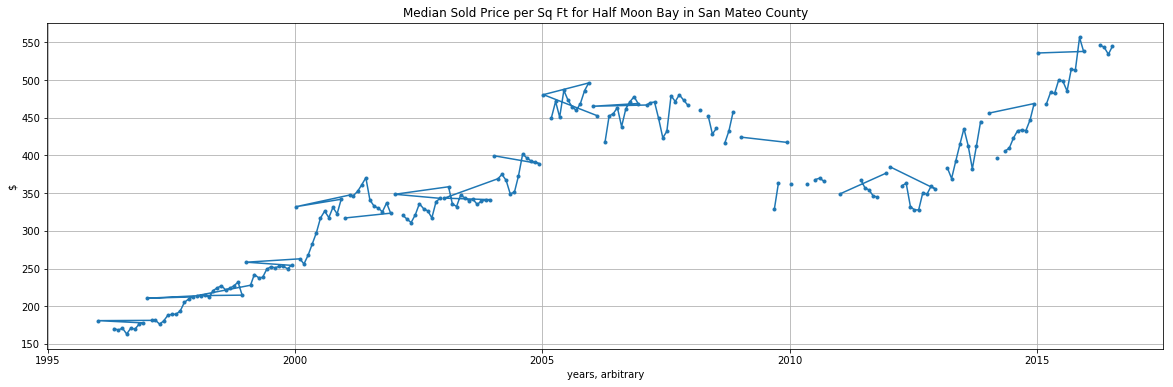

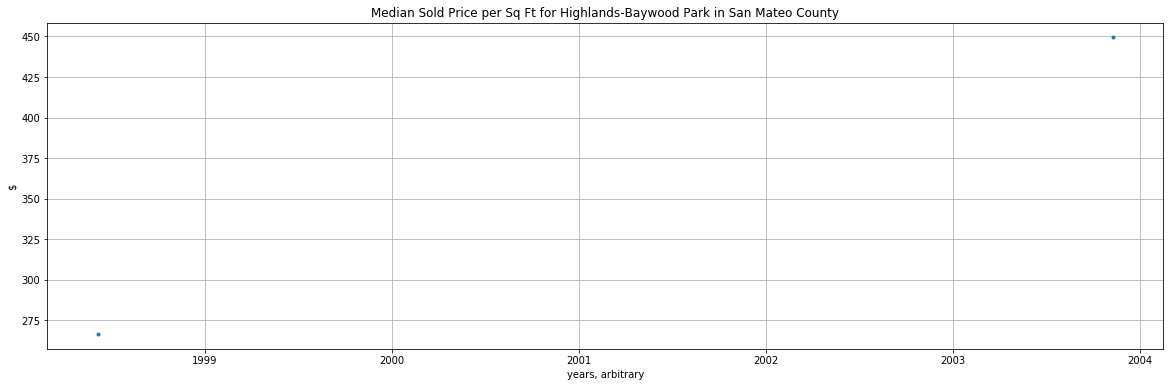

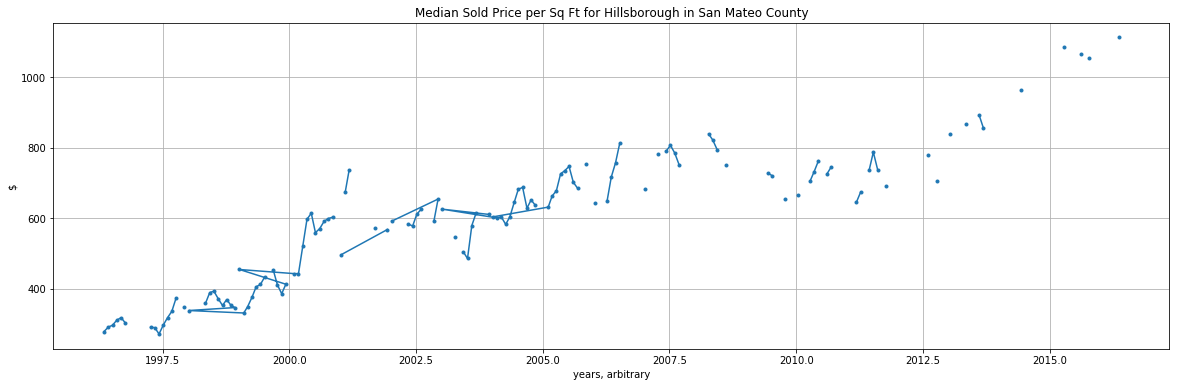

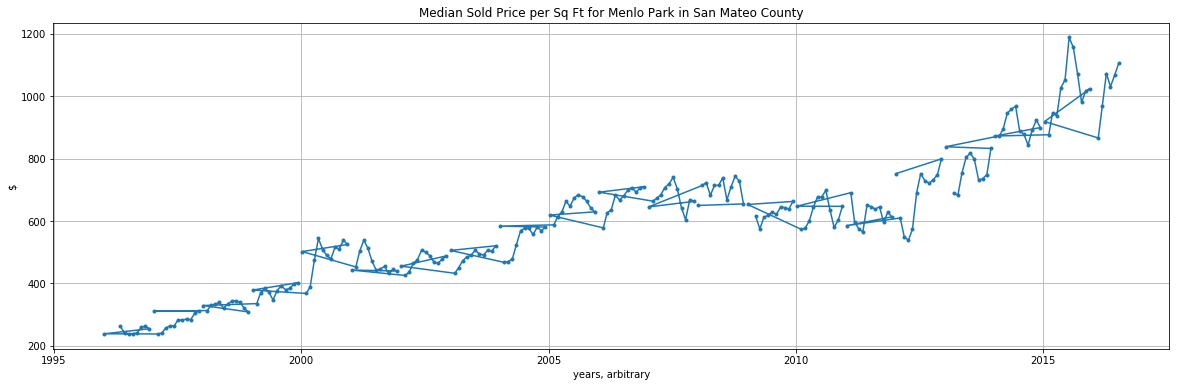

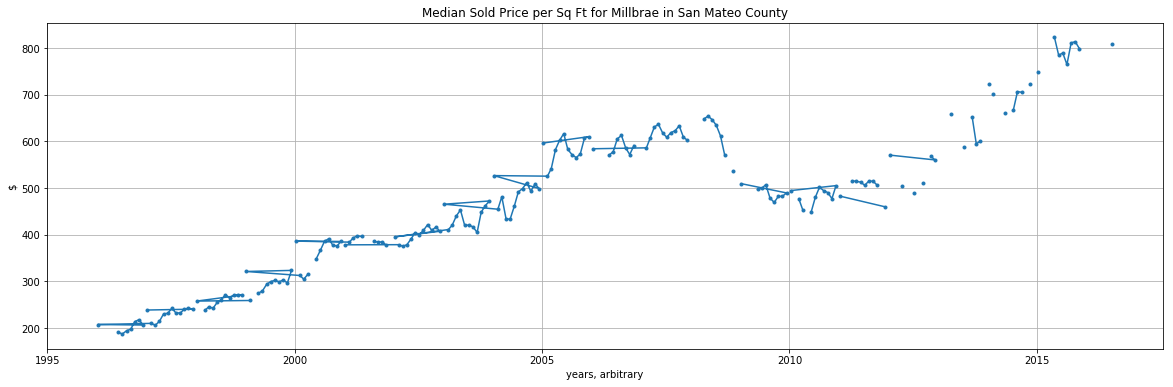

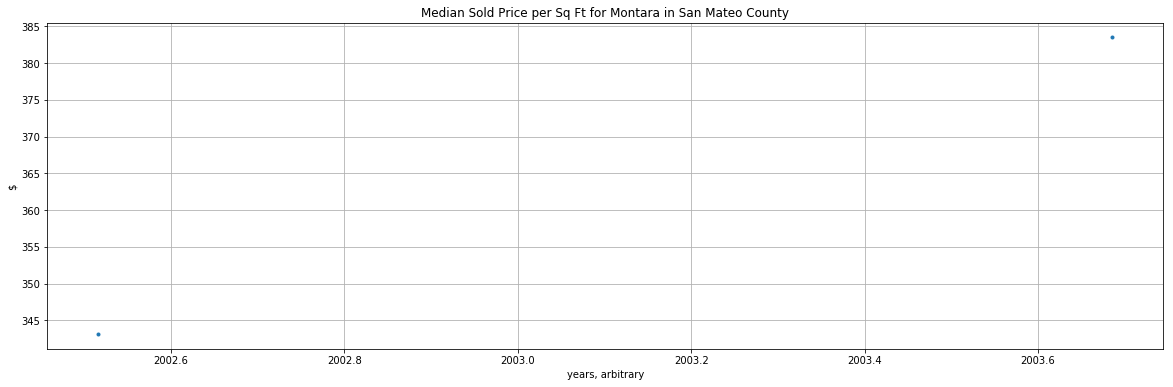

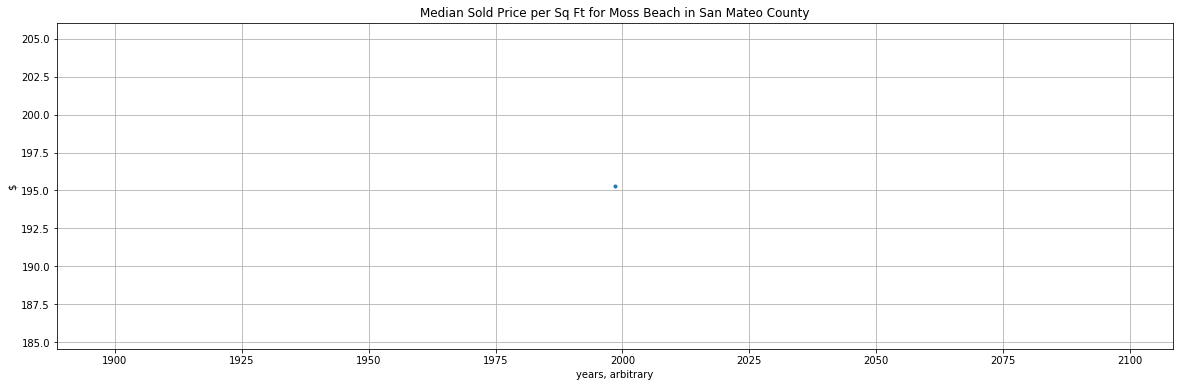

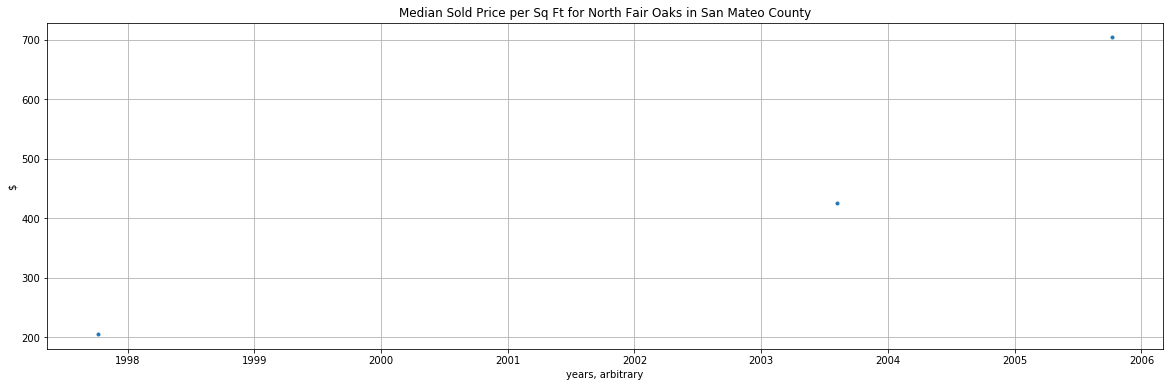

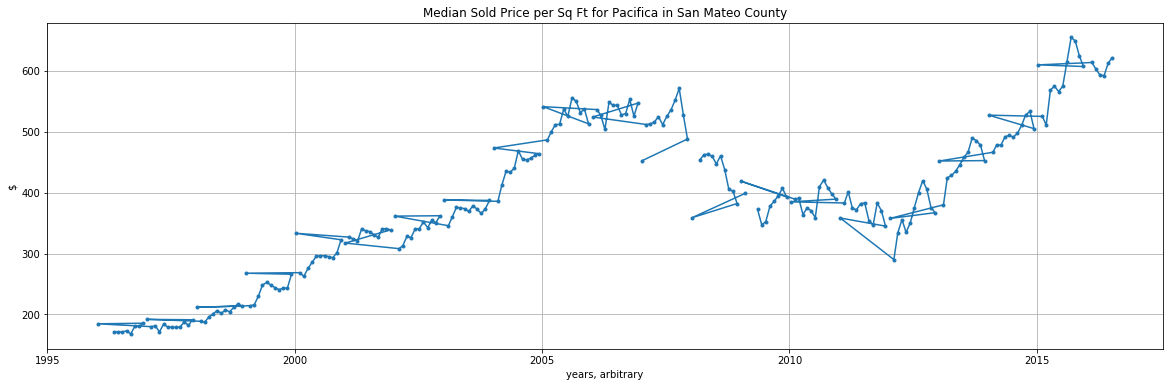

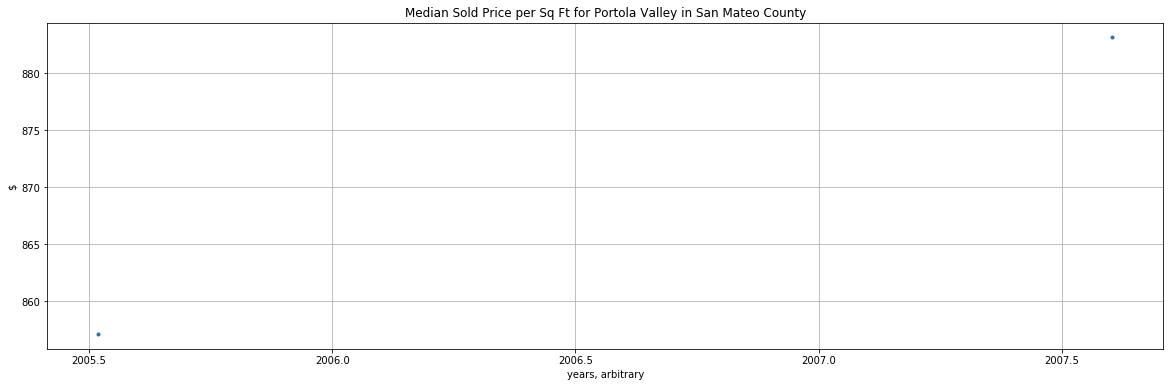

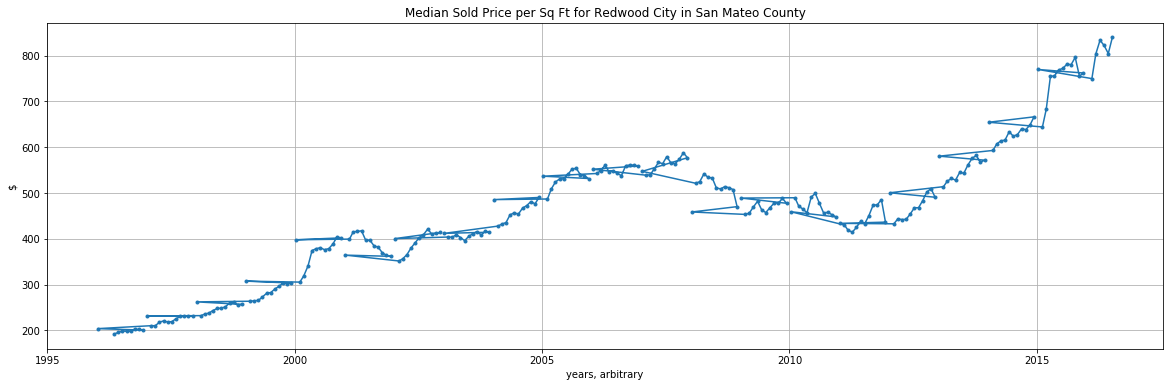

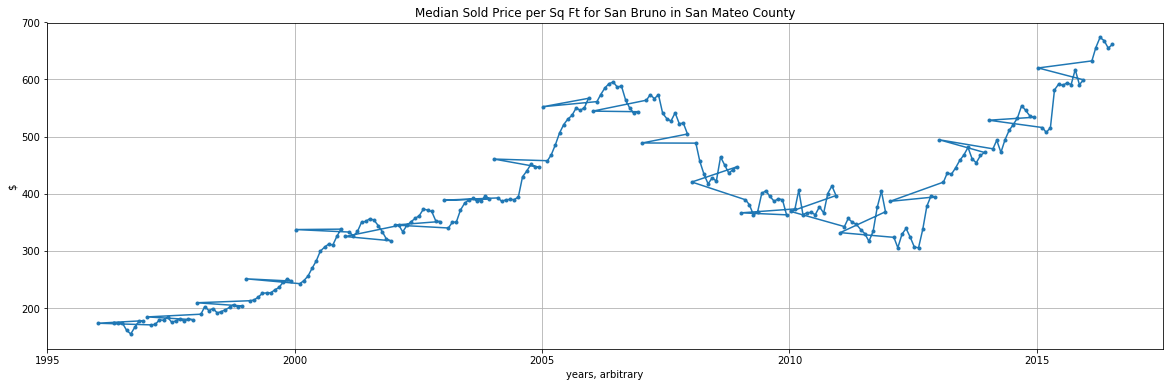

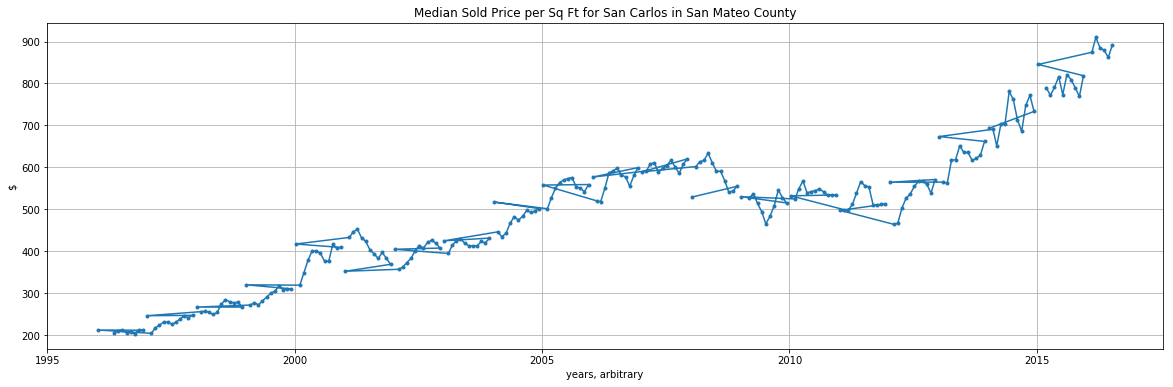

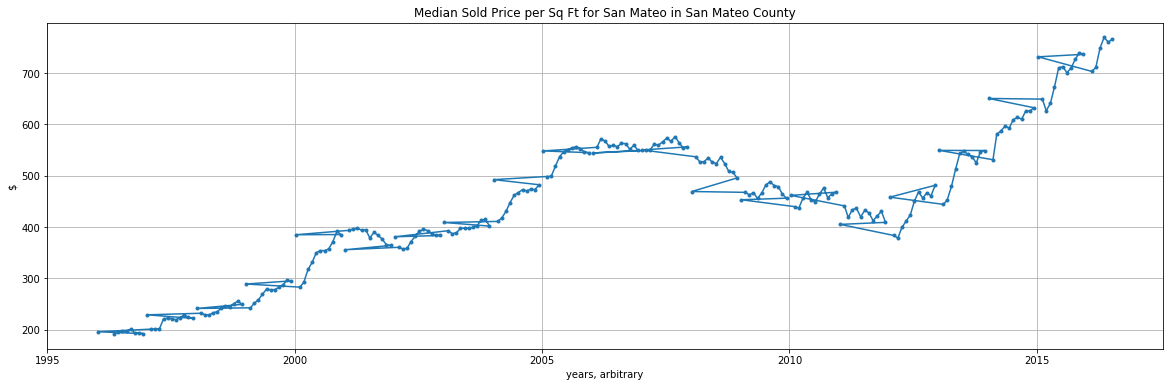

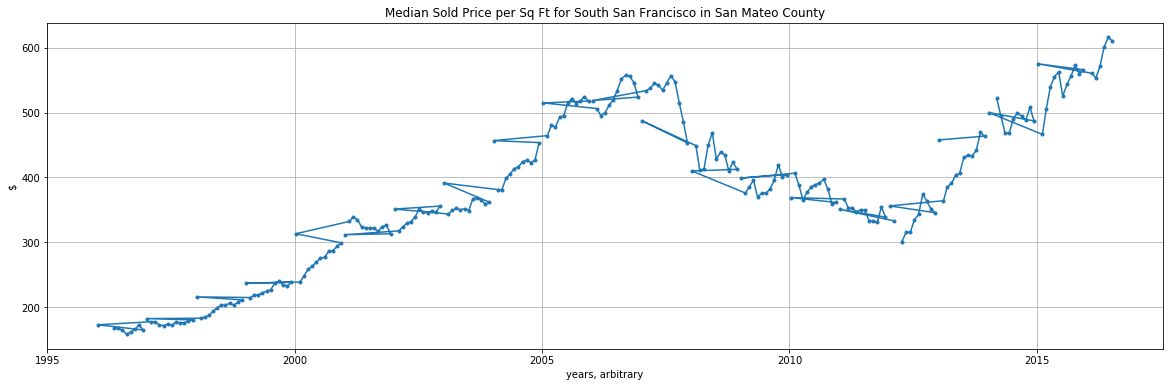

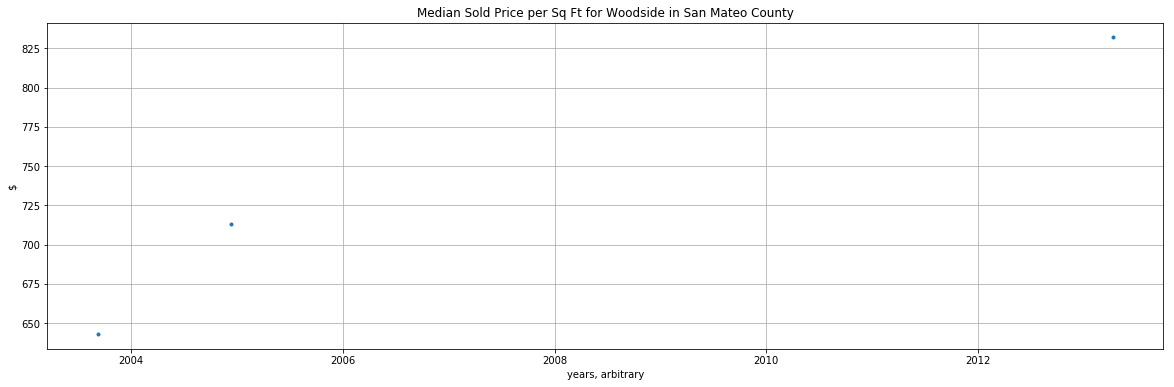

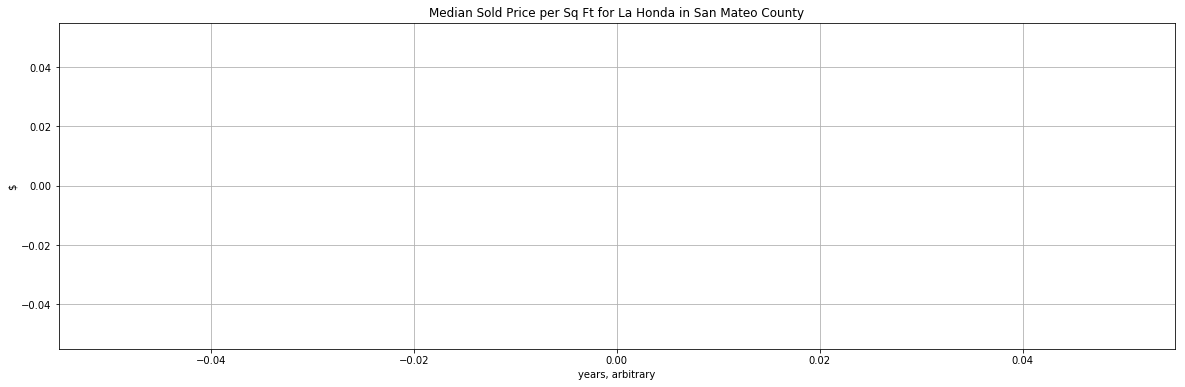

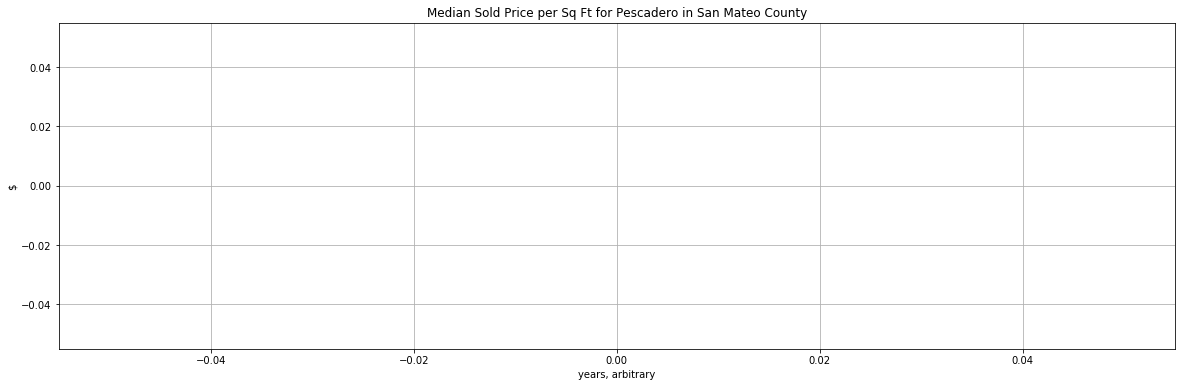

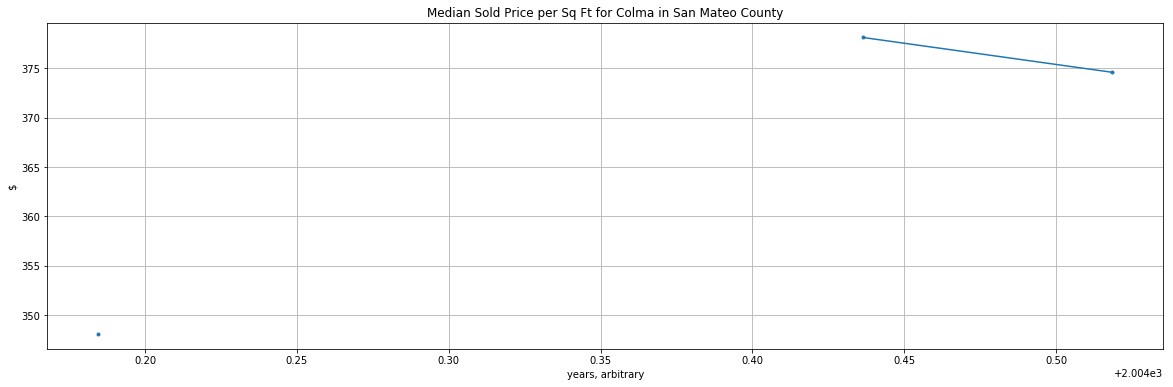

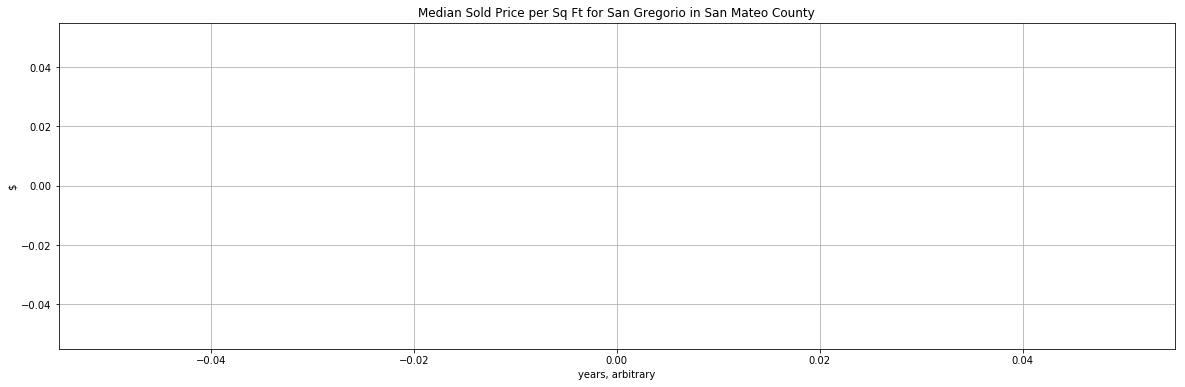

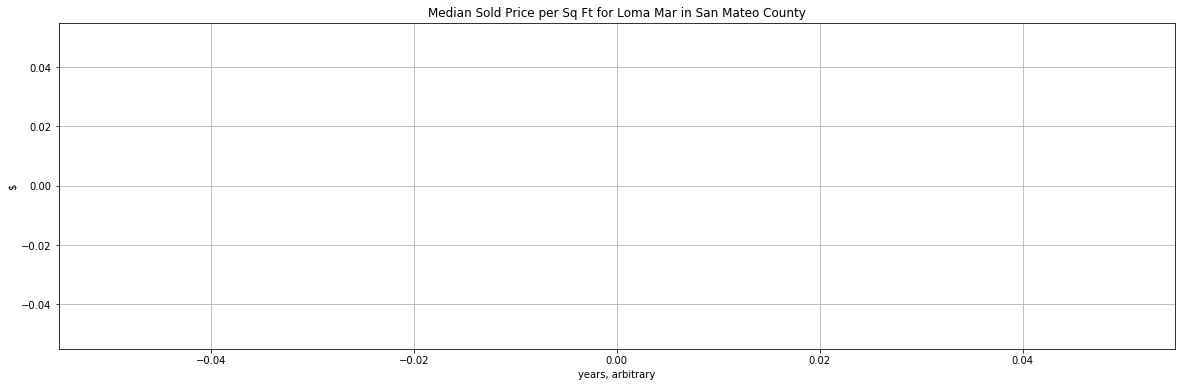

In [66]:
regions = sample['City'].unique()
# plt.figure(figsize=[20,6])
for region in regions:
    plt.figure(figsize=[20,6])
    dates = sample.loc[sample['City']==region,'Date'].apply(express_as_year)
    price = sample.loc[sample['City']==region,'MedianSoldPricePerSqft_AllHomes']
    plt.plot(dates,price,'.-')
    plt.title('Median Sold Price per Sq Ft for %s in %s County' % (region,county_of_interest))
    plt.grid(True)
    plt.ylabel('$')
    plt.xlabel('years, arbitrary')
    plt.show()
# plt.title('%s regions in %s' % (len(regions),county_of_interest))
# plt.ylim([0,500])
# plt.show()

In [16]:
city_time_series.keys()

Index(['Date', 'RegionName', 'HomesSoldAsForeclosuresRatio_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop'